In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
import imageio
import cv2
from PIL import Image
from tqdm import tqdm

model_path = 'C:/Users/vanag/Desktop/test_model.h5'

In [ ]:
def vid2frame(path_in):
  vidcap = cv2.VideoCapture(path_in)
  success,image = vidcap.read()
  frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
  path_out = path_in.replace(".mp4", "/")
  os.mkdir(path_out)
  os.chdir(path_out)
  for i in tqdm(range(frames)):
    image = image[140:340, 260:460]
    image = cv2.resize(image, (28, 28))
    cv2.imwrite("%d.jpg" % i, image)
    success,image = vidcap.read()

# vid2frame('C:/Users/vanag/Desktop/firstdigit.mp4')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
train_files = os.listdir('C:/Users/vanag/Desktop/train')

x_train = ([])
y_train = ([])
for i in tqdm(range(len(train_files))):
    file = 'C:/Users/vanag/Desktop/train/' + train_files[i]
    label = train_files[i][0]
    img = cv2.imread(file)
    img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train, dtype =np.uint8)
# y_train = [int(k) for k in y_train]

100%|██████████| 3970/3970 [00:01<00:00, 3772.99it/s]


In [ ]:
test_files = os.listdir('C:/Users/vanag/Desktop/test')

x_test = ([])
y_test = ([])

for i in tqdm(range(len(test_files))):
    file = 'C:/Users/vanag/Desktop/test/' + test_files[i]
    label = test_files[i][0]
    img = cv2.imread(file)
    img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    x_test.append(img)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test, dtype =np.uint8)


# y_test = [int(j) for j in y_test]

# y_test.astype(dtype as np.uint8)

100%|██████████| 280/280 [00:00<00:00, 2778.86it/s]


Epoch 1/10
32/32 [==============================] - 5s 140ms/step - loss: 0.6944 - accuracy: 0.7877 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 5s 147ms/step - loss: 0.0381 - accuracy: 0.9924 - val_loss: 8.2048e-05 - val_accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 5s 163ms/step - loss: 0.0320 - accuracy: 0.9942 - val_loss: 1.1908e-04 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 5s 170ms/step - loss: 0.0229 - accuracy: 0.9957 - val_loss: 8.4993e-05 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 6s 174ms/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 1.8198e-05 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 5s 163ms/step - loss: 0.0166 - accuracy: 0.9965 - val_loss: 7.2374e-05 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 6s 192ms/step - loss: 0.0133 - accuracy: 0.9975 - val_loss: 3.4524e-05 - val

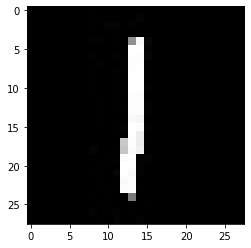

In [ ]:
img_rows, img_cols = 28, 28

num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

plt.imshow((x_test[69]), cmap = plt.get_cmap('gray'))

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test / 255



batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save(model_path)

In [ ]:
model.save(model_path)

6


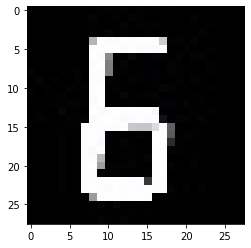

In [ ]:
# model = load_model(model_path)
img = cv2.imread('C:/Users/vanag/Desktop/thirddigit/8764.jpg')
plt.imshow(img, cmap = plt.get_cmap('gray'))
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
img = img.reshape(1, 28, 28, 1)
img /= 255

prediction = model.predict(img)
print(prediction.argmax())

In [ ]:
model = load_model(model_path)

second_path = 'C:/Users/vanag/Desktop/seconddigit/'
third_path = 'C:/Users/vanag/Desktop/thirddigit/'

second_files = os.listdir(second_path)
third_files = os.listdir(third_path)

second_labels = []
third_labels = []

for i in tqdm(range(len(third_files))):

  img_2_path = second_path + second_files[i]
  img_3_path = third_path + third_files[i]

  img_2 = cv2.imread(img_2_path)
  img_3 = cv2.imread(img_3_path)

  img_2 = np.dot(img_2[...,:3], [0.299, 0.587, 0.114])
  img_3 = np.dot(img_3[...,:3], [0.299, 0.587, 0.114])

  img_2 = img_2.reshape(1, 28, 28, 1)
  img_3 = img_3.reshape(1, 28, 28, 1)

  img_2 /= 255
  img_3 /= 255

  prediction_2 = model.predict(img_2)
  prediction_3 = model.predict(img_3)

  second_labels.append(prediction_2.argmax())
  third_labels.append(prediction_3.argmax())

100%|██████████| 28827/28827 [36:13<00:00, 13.26it/s]  


In [ ]:
full_label = []
for i in range(len(second_labels)):
  full_label.append(float ('0.1' + str(second_labels[i]) + str(third_labels[i])))

full_label = np.array(full_label)
np.savetxt("C:/Users/vanag/Desktop/data.txt", full_label, fmt="%s")

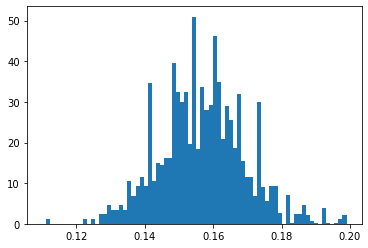

In [ ]:
a = plt.hist(full_label, len(np.unique(full_label)), density=True)

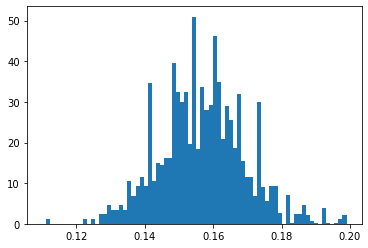

In [ ]:
a = plt.hist(full_label, len(np.unique(full_label)), density=True)

mean = np.mean(full_label)

std = np.std(full_label)

def chi_squre_method_2(a, mean, std):
    """
    2nd method to calculate the chi square based on integration.

    array a[0] contains heights of bins
    array a[1] contains midpoint values on x axis of bins

    """


    integration_point = mean + std  #we consider integral up to 1std past mean

    gaussian_integral_val = 0.8413      #use value table to look up

    #find area of bins up to this x val
    temp = np.array([])
    barwidth = a[1][1] - a[1][0]
    error_per_bar = np.array([])

    for i in range(len(a[0])):
        if a[1][i] <= integration_point:
            temp = np.append(temp, barwidth * a[0][i])
            error_per_bar = np.append(error_per_bar, np.sqrt(np.sqrt(a[0][i]) / (a[0][i])) * (barwidth * a[0][i]) )

    area_hist = np.sum(temp)

    diff_between_areas = area_hist - gaussian_integral_val

    error_per_bar_squared = error_per_bar**2
    error_per_bar_squared = error_per_bar_squared[~np.isnan(error_per_bar_squared)] #remove nan values

    integral_error = np.sum(error_per_bar_squared)     #needs to be total error on histogram area

    chi_square = ((diff_between_areas) / integral_error)**2

    print(chi_square, 'chi squ')

    red_chi = chi_square / (len(temp) -2)

    print(red_chi, 'red chi')

    return

In [ ]:
chi_squre_method_2(a, mean, std)

23.940241988659242 chi squ
0.48857636711549474 red chi


C:\Users\vanag\AppData\Local\Temp/ipykernel_11484/3787950274.py:29: RuntimeWarning: invalid value encountered in double_scalars
  error_per_bar = np.append(error_per_bar, np.sqrt(np.sqrt(a[0][i]) / (a[0][i])) * (barwidth * a[0][i]) )
